### Исследовательский анализ данных сервиса Яндекс Афиша за период с 01.06.2024 по 31.10.2024

Автор: Дзержговский Евгений Александрович

Дата: 27.08.2025

### Цель и задачи проекта

Проверить как повлияла на продажи билетов сезонность, изменилась ли аудитория клиентов, какие события стали чаще привлекать клиентов, какие площадки и организаторы популярнее и зависит ли активность пользователей от их устройств, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

### Содержание проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных и проверка гипотез.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu ,shapiro

In [1]:
# Выгружаем данные
orders = pd.read_csv(...)
events = pd.read_csv(...)
tenge = pd.read_csv(...)

NameError: name 'pd' is not defined

In [3]:
# Выводим первые строки
orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
# Выводим информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Полученный датафрейм `orders` состоит из 290849 строк и 14 столбцов. Пропуски есть только в поле `days_since_prev` как и предполагалось изначально. Типы данных не во всех столбцах представлены корректно, возможно изменим их при необходимости в будущем.

In [5]:
# Выводим первые строки
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [6]:
# Выводим информацию
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Полученный датафрейм `events` состоит из 22427 строк и 11 столбцов. Пропусков в данных нет. Типы данных не во всех столбцах представлены корректно, возможно изменим их при необходимости в будущем.

In [7]:
# Выводим первые строки
tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [8]:
# Выводим информацию
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Полученный датафрейм `tenge` состоит из 357 строк и 4 столбцов. Пропусков в данных нет. Типы данных представлены не корректно в поле `data`, возможно приведем в будущем к формату `datetime` при необходимости.

### Промежуточный вывод

Первичное знакомство показывает, что данные соответствуют описанию и выглядят корректными. Типы данных во многих столбцах представлены не корректно, возможно изменим нужные столбцы на этапе предобработки. В датасетах `events` и `tenge` нет пропущенных значений, а в датасете `orders` пропущенные значения есть только в поле `days_since_prev` как и ожидалось.

### Создаем единый датафрейм

In [9]:
# Объединяем датафреймы orders и events
dfs = pd.merge(orders, events, on='event_id', how='left')

In [10]:
# Объединяем датафреймы dfs и tenge
df = pd.merge(dfs, tenge, left_on='created_dt_msk', right_on='data', how='left')

In [11]:
# ВЫводим первые строки
df.head().style

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.940000,Край билетов,4,10870.990000,nan,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.000000,3972.000000,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.697200,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450000,Мой билет,2,2067.510000,nan,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.000000,2941.000000,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.341900,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.570000,За билетом!,4,13984.160000,75.000000,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.000000,4507.000000,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.647500,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,Лови билет!,2,212.280000,nan,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.000000,3574.000000,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.501000,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410000,Билеты без проблем,3,10695.430000,83.000000,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.000000,1896.000000,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.664800,kzt


In [12]:
# Приводим столбцы с категориальными значениями к типу category
df[['cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'service_name', 'event_type_description', 
    'event_type_main', 'region_name', 'city_name', 'venue_name', 'venue_address']] = df[['cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'service_name', 'event_type_description', 
    'event_type_main', 'region_name', 'city_name', 'venue_name', 'venue_address']].astype('category')

In [13]:
# Выводим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   order_id                290849 non-null  int64   
 1   user_id                 290849 non-null  object  
 2   created_dt_msk          290849 non-null  object  
 3   created_ts_msk          290849 non-null  object  
 4   event_id                290849 non-null  int64   
 5   cinema_circuit          290849 non-null  category
 6   age_limit               290849 non-null  category
 7   currency_code           290849 non-null  category
 8   device_type_canonical   290849 non-null  category
 9   revenue                 290849 non-null  float64 
 10  service_name            290849 non-null  category
 11  tickets_count           290849 non-null  int64   
 12  total                   290849 non-null  float64 
 13  days_since_prev         268909 non-null  float64 
 14  even

In [14]:
# Проверяем размеры датасетов до объединения и после
print("Размер orders:", len(orders))
print("Размер events:", len(events))
print("Размер tenge:", len(tenge))
print("Размер dfs:", len(dfs))
print("Размер df:", len(df))


Размер orders: 290849
Размер events: 22427
Размер tenge: 357
Размер dfs: 290849
Размер df: 290849


Размер датасета после объединения соответсвует ожидаемому, значит объединение прошло успешно и проблем с данными нет.

## 2. Предобработка данных

In [15]:
# Проверяем нужные категориальные столбцы на неявные дубликаты
for column in ['age_limit', 'currency_code', 'device_type_canonical', 'event_type_main']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце age_limit:
[0, 6, 12, 16, 18]
Categories (5, int64): [0, 6, 12, 16, 18]

Уникальные значения в столбце currency_code:
['kzt', 'rub']
Categories (2, object): ['kzt', 'rub']

Уникальные значения в столбце device_type_canonical:
['desktop', 'mobile']
Categories (2, object): ['desktop', 'mobile']

Уникальные значения в столбце event_type_main:
['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки', NaN]
Categories (7, object): ['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']



In [16]:
# Проверяем на наличие дубликатов столбцы по всем основным признакам, кроме order_id
df.duplicated(subset=['user_id', 'created_ts_msk', 'event_id', 'age_limit', 'currency_code', 'device_type_canonical', 
                      'revenue', 'service_name', 'total']).sum()

42

In [17]:
# Удаляем обнаруженные дубликаты
df = df.drop_duplicates(subset=['user_id', 'created_ts_msk', 'event_id', 'age_limit', 'currency_code', 'device_type_canonical',
                                'revenue', 'service_name', 'total'], keep='first')

Неявных дубликатов обнаружено и удалено 42 строки. Видим, что после соединения таблиц в поле `event_type_main` появилось значение `Nan`. Оставим как есть, удаление может повлиять на результат анализа.

In [18]:
# Анализ категориальных значений
for column in ['age_limit', 'currency_code', 'device_type_canonical', 'service_name']:
    print(f"\nColumn: {column}")
    print("Unique values:", df[column].unique())
    print("Missing values count:", df[column].isna().sum())
    print("Value counts:")
    print(df[column].value_counts(dropna=False), "\n")


Column: age_limit
Unique values: [16, 0, 18, 12, 6]
Categories (5, int64): [0, 6, 12, 16, 18]
Missing values count: 0
Value counts:
16    78573
12    62551
0     61475
6     52164
18    36044
Name: age_limit, dtype: int64 


Column: currency_code
Unique values: ['rub', 'kzt']
Categories (2, object): ['kzt', 'rub']
Missing values count: 0
Value counts:
rub    285739
kzt      5068
Name: currency_code, dtype: int64 


Column: device_type_canonical
Unique values: ['mobile', 'desktop']
Categories (2, object): ['desktop', 'mobile']
Missing values count: 0
Value counts:
mobile     232647
desktop     58160
Name: device_type_canonical, dtype: int64 


Column: service_name
Unique values: ['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!', 'Билеты без проблем', ..., 'Цвет и билет', 'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете']
Length: 36
Categories (36, object): ['Crazy ticket!', 'Show_ticket', 'Билет по телефону', 'Билеты без проблем', ..., 'Тех билет', 'Цвет и билет', 'Шоу н

In [19]:
# Проверяем данные на явные дубликаты
df.duplicated().sum()

0

In [20]:
# Приводим столбцы с датой created_dt_msk, created_ts_msk, data к формату datetime
df[['created_dt_msk', 'created_ts_msk', 'data']] = df[['created_dt_msk', 'created_ts_msk', 'data']].apply(pd.to_datetime)

In [21]:
# Выводим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290807 entries, 0 to 290848
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290807 non-null  int64         
 1   user_id                 290807 non-null  object        
 2   created_dt_msk          290807 non-null  datetime64[ns]
 3   created_ts_msk          290807 non-null  datetime64[ns]
 4   event_id                290807 non-null  int64         
 5   cinema_circuit          290807 non-null  category      
 6   age_limit               290807 non-null  category      
 7   currency_code           290807 non-null  category      
 8   device_type_canonical   290807 non-null  category      
 9   revenue                 290807 non-null  float64       
 10  service_name            290807 non-null  category      
 11  tickets_count           290807 non-null  int64         
 12  total                   290807

### Создаем новые столбцы

In [22]:
# Определяем функцию, которая создаст новый столбец с конверсией валюты в зависимости от наличия данных в другом столбце
def cur(a, b, c):
    if a == 'rub':
        return b
    else:
        return b / 100 * c

In [23]:
# Создаем новый столбец revenue_rub с выручкой в единой валюте
df['revenue_rub'] = df.apply(lambda x: cur(x['currency_code'], x['revenue'], x['curs']), axis=1)

In [24]:
# Проверяем добавление нового столбца
df.loc[df['currency_code']=='kzt'].head().style

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub
73,7850214,0033403583a55ed,2024-09-17 00:00:00,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.100000,Билеты без проблем,4,10361.970000,20.000000,f5ec2467-ee48-42f3-89a0-a2d90d1d6fce,событие,другое,№5088,Верхоречная область,Серебрянка,163.000000,1533.000000,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",2024-09-17 00:00:00,100,19.012500,kzt,98.503762
92,8634925,0040e12d70fae81,2024-09-02 00:00:00,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.180000,Билеты без проблем,3,6943.610000,39.000000,61ec7c0e-ea0c-4a3e-a63a-09cbe1bc6177,событие,другое,№5088,Верхоречная область,Серебрянка,163.000000,1533.000000,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",2024-09-02 00:00:00,100,18.933000,kzt,65.731589
99,7625522,0054b38b2653e6e,2024-09-09 00:00:00,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.770000,Билеты без проблем,4,10959.070000,nan,524f434e-0381-4f47-9688-7c4e41961b65,событие,другое,№5088,Верхоречная область,Серебрянка,163.000000,1533.000000,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",2024-09-09 00:00:00,100,18.599100,kzt,61.148261
289,720419,00f4f5244501ce6,2024-06-11 00:00:00,2024-06-11 20:15:57,536826,нет,12,kzt,mobile,22021.550000,Мой билет,5,275269.400000,nan,76af4f88-c554-4e9e-9df4-1cc8aeec8959,концерт,концерты,№4950,Верхоречная область,Серебрянка,163.000000,2066.000000,"Архитектурное бюро ""Секрет"" Инк","пер. Проточный, д. 70 к. 881",2024-06-11 00:00:00,100,19.892800,kzt,4380.702898
472,5227657,01370a0e9c1a7d5,2024-06-04 00:00:00,2024-06-04 13:28:17,533803,нет,16,kzt,desktop,7397.660000,Мой билет,4,123294.320000,1.000000,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.000000,3407.000000,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-06-04 00:00:00,100,19.983300,kzt,1478.296591


In [25]:
# Создаем новый столбец one_ticket_revenue_rub с выручкой от продажи одного билета
df['one_ticket_revenue_rub'] = df['revenue_rub'] / df['tickets_count']

In [26]:
# Проверяем добавление нового столбца
df.head().style

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20 00:00:00,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.940000,Край билетов,4,10870.990000,nan,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.000000,3972.000000,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20 00:00:00,100,18.697200,kzt,1521.940000,380.485000
1,7965605,0005ca5e93f2cf4,2024-07-23 00:00:00,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450000,Мой билет,2,2067.510000,nan,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.000000,2941.000000,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23 00:00:00,100,18.341900,kzt,289.450000,144.725000
2,7292370,0005ca5e93f2cf4,2024-10-06 00:00:00,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.570000,За билетом!,4,13984.160000,75.000000,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.000000,4507.000000,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06 00:00:00,100,19.647500,kzt,1258.570000,314.642500
3,1139875,000898990054619,2024-07-13 00:00:00,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,Лови билет!,2,212.280000,nan,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.000000,3574.000000,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13 00:00:00,100,18.501000,kzt,8.490000,4.245000
4,972400,000898990054619,2024-10-04 00:00:00,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410000,Билеты без проблем,3,10695.430000,83.000000,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.000000,1896.000000,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04 00:00:00,100,19.664800,kzt,1390.410000,463.470000


In [27]:
# Создаем новый столбец month с месяцом заказа
df['month'] = df['created_dt_msk'].dt.month

In [28]:
# Проверяем добавление нового столбца
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.4850,8
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45,144.7250,7
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57,314.6425,10
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49,4.2450,7
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41,463.4700,10


In [29]:
# Создаем пустой список для категорий сезонности
season = []

In [30]:
# Классифицируем сезоннность с помощью циклов и условий
for date in df['month']:
    if date >= 3 and date <= 5:
        season.append('весна')
    elif date >= 6 and date <= 8:
        season.append('лето')
    elif date >= 9 and date <= 11:
        season.append('осень')
    else:
        season.append('зима')

In [31]:
# Добавляем результат в новый столбец season с информацией о сезонности
df['season'] = season

In [32]:
# Проверяем добавление нового столбца
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41,463.4700,10,осень


In [33]:
# Выводим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290807 entries, 0 to 290848
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290807 non-null  int64         
 1   user_id                 290807 non-null  object        
 2   created_dt_msk          290807 non-null  datetime64[ns]
 3   created_ts_msk          290807 non-null  datetime64[ns]
 4   event_id                290807 non-null  int64         
 5   cinema_circuit          290807 non-null  category      
 6   age_limit               290807 non-null  category      
 7   currency_code           290807 non-null  category      
 8   device_type_canonical   290807 non-null  category      
 9   revenue                 290807 non-null  float64       
 10  service_name            290807 non-null  category      
 11  tickets_count           290807 non-null  int64         
 12  total                   290807

In [34]:
# Проверяем распределение значений в поле revenue_rub
df['revenue_rub'].describe()

count    290807.000000
mean        555.145708
std         875.310539
min         -90.760000
25%         113.410000
50%         350.330000
75%         802.050000
max       81174.540000
Name: revenue_rub, dtype: float64

In [35]:
# Рассчитываем 99 процентиль
q99 = df['revenue_rub'].quantile(0.99)
display(q99)

2628.4217390400004

In [36]:
# Отбираем значения по 99 процентилю
df_f = df[df['revenue_rub'] <= q99]

In [37]:
# Выводим информацию
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287982 entries, 0 to 290848
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287982 non-null  int64         
 1   user_id                 287982 non-null  object        
 2   created_dt_msk          287982 non-null  datetime64[ns]
 3   created_ts_msk          287982 non-null  datetime64[ns]
 4   event_id                287982 non-null  int64         
 5   cinema_circuit          287982 non-null  category      
 6   age_limit               287982 non-null  category      
 7   currency_code           287982 non-null  category      
 8   device_type_canonical   287982 non-null  category      
 9   revenue                 287982 non-null  float64       
 10  service_name            287982 non-null  category      
 11  tickets_count           287982 non-null  int64         
 12  total                   287982

In [38]:
# Проверяем распределение значений в поле tickets_count
df_f['tickets_count'].describe()

count    287982.000000
mean          2.740425
std           1.162903
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

In [39]:
# Рассчитываем 99 процентиль
q99_t = df_f['tickets_count'].quantile(0.99)
display(q99_t)

6.0

In [40]:
# Отбираем значения по 99 процентилю
df_2 = df_f[df_f['tickets_count'] <= q99_t]

In [41]:
# Выводим информацию
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287802 entries, 0 to 290848
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287802 non-null  int64         
 1   user_id                 287802 non-null  object        
 2   created_dt_msk          287802 non-null  datetime64[ns]
 3   created_ts_msk          287802 non-null  datetime64[ns]
 4   event_id                287802 non-null  int64         
 5   cinema_circuit          287802 non-null  category      
 6   age_limit               287802 non-null  category      
 7   currency_code           287802 non-null  category      
 8   device_type_canonical   287802 non-null  category      
 9   revenue                 287802 non-null  float64       
 10  service_name            287802 non-null  category      
 11  tickets_count           287802 non-null  int64         
 12  total                   287802

In [42]:
# Рассчитываем количество срезанных строк
diff_data = len(df) - len(df_2)
display(diff_data)

3005

In [43]:
# Рассчитываем долю срезанных данных
share_data = round(diff_data / len(df) * 100, 2)
display(f"Доля срезанных данных: {share_data}%")

'Доля срезанных данных: 1.03%'

### Промежуточный вывод

Результаты предобработки данных:
- Явных дубликатов не обнаружено. Было обнаружено 42 неявных дубликата и удалено;
- Столбцы `created_dt_msk`, `created_ts_msk`, `data` были приведены к формату datetime;
- Был добавлен новый столбец `revenue_rub` с конверсией валюты тенге в рубли;
- Был добавлен новый столбец `one_ticket_revenue_rub` с выручкой от продажи одного билета;
- Был добавлен новый столбец `month` с месяцом заказа;
- Был добавлен новый столбец `season` с информацией о сезонности;
- Отобрали значения данных по 99 процентилю в полях `revenue_rub` и `tickets_count` для исключения выбросов и аномалий;
- Доля срезанных данных составила 1,03%.

## 3. Исследовательский анализ данных

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

In [44]:
# Рассчитываем количество заказов по месяцам
df_2.groupby('month')['order_id'].count()

month
6     34064
7     40427
8     44567
9     69384
10    99360
Name: order_id, dtype: int64

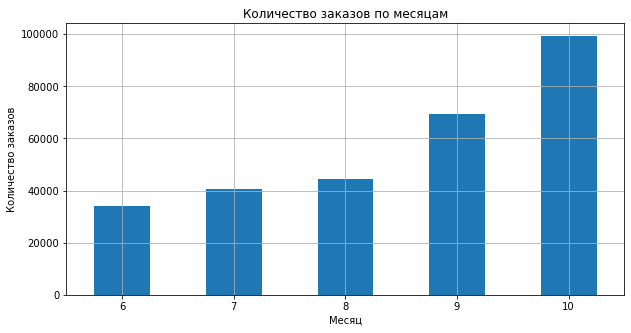

In [45]:
# Строим столбчатую диаграмму
df_2.groupby('month')['order_id'].count().plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

На графике хорошо видно, что от июня к ноябрю фиксируется рост. Более высокий рост фиксируется в сентябре и октябре.

In [46]:
# Рассчитываем распределение заказов по типу мероприятия для летнего периода
summer_event = df_2['event_type_main'].loc[df['season'] == 'лето'].value_counts(normalize=True)
display(summer_event)

концерты    0.425372
другое      0.271773
театр       0.201536
стендап     0.053415
спорт       0.025277
выставки    0.020330
ёлки        0.002297
Name: event_type_main, dtype: float64

In [47]:
# Рассчитываем распределение заказов по типу мероприятия для осеннего периода
autumn_event = df_2['event_type_main'].loc[df['season'] == 'осень'].value_counts(normalize=True)
display(autumn_event)

концерты    0.372749
театр       0.253393
другое      0.196507
спорт       0.111841
стендап     0.041038
выставки    0.014438
ёлки        0.010034
Name: event_type_main, dtype: float64

In [48]:
# Создаем датафрейм для удобства построения графика
data_event = pd.DataFrame({'Лето': summer_event, 'Осень': autumn_event})

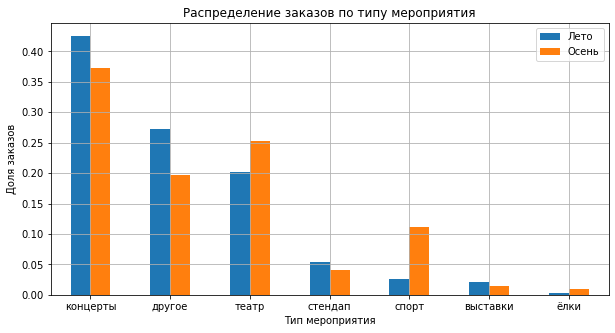

In [49]:
# Строим столбчатую диаграмму
data_event.sort_values(by='Лето', ascending=False).plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('Распределение заказов по типу мероприятия')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля заказов')
plt.legend()
plt.grid()
plt.show()

In [50]:
# Рассчитываем распределение заказов по типу устройства для летнего периода
summer_device = df_2['device_type_canonical'].loc[df['season'] == 'лето'].value_counts(normalize=True)
display(summer_device)

mobile     0.807027
desktop    0.192973
Name: device_type_canonical, dtype: float64

In [51]:
# Рассчитываем распределение заказов по типу устройства для осенннего периода
autumn_device = df_2['device_type_canonical'].loc[df['season'] == 'осень'].value_counts(normalize=True)
display(autumn_device)

mobile     0.796656
desktop    0.203344
Name: device_type_canonical, dtype: float64

In [52]:
# Создаем датафрейм для удобства построения графика
data_device = pd.DataFrame({'Лето': summer_device, 'Осень': autumn_device})

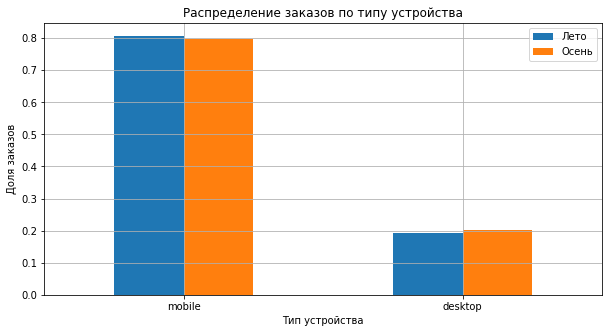

In [53]:
# Строим столбчатую диаграмму
data_device.sort_values(by='Лето', ascending=False).plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('Распределение заказов по типу устройства')
plt.xlabel('Тип устройства')
plt.ylabel('Доля заказов')
plt.legend()
plt.grid()
plt.show()

In [54]:
# Рассчитываем распределение заказов по категории мероприятия по возрастному рейтингу для летнего периода
summer_age = df_2['age_limit'].loc[df['season'] == 'лето'].value_counts(normalize=True)
display(summer_age)

16    0.283719
12    0.203489
6     0.182902
0     0.179602
18    0.150288
Name: age_limit, dtype: float64

In [55]:
# Рассчитываем распределение заказов по категории мероприятия по возрастному рейтингу для осеннего периода
autumn_age = df_2['age_limit'].loc[df['season'] == 'осень'].value_counts(normalize=True)
display(autumn_age)

16    0.262077
0     0.235925
12    0.220974
6     0.176931
18    0.104093
Name: age_limit, dtype: float64

In [56]:
# Создаем датафрейм для удобства построения графика
data_age = pd.DataFrame({'Лето': summer_age, 'Осень': autumn_age})

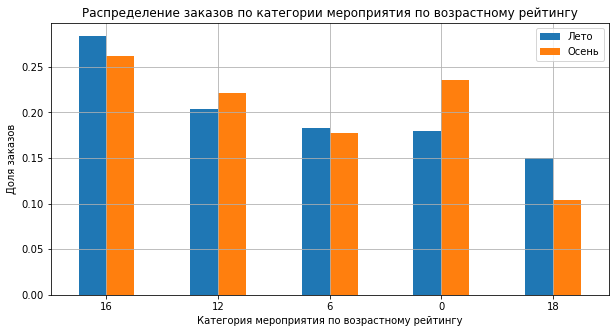

In [57]:
# Строим столбчатую диаграмму
data_age.sort_values(by='Лето', ascending=False).plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('Распределение заказов по категории мероприятия по возрастному рейтингу')
plt.xlabel('Категория мероприятия по возрастному рейтингу')
plt.ylabel('Доля заказов')
plt.legend()
plt.grid()
plt.show()

In [58]:
# Рассчитываем среднюю стоимость билета по типу мероприятия для летнего периода
summer_avg = df_2.loc[df_2['season'] == 'лето'].groupby('event_type_main')['one_ticket_revenue_rub'].mean().sort_values(ascending=False)
display(summer_avg)

event_type_main
концерты    302.357275
ёлки        271.436176
стендап     218.585827
театр       214.439657
выставки     86.416198
другое       77.400050
спорт        50.744650
Name: one_ticket_revenue_rub, dtype: float64

In [59]:
# Рассчитываем среднюю стоимость билета по типу мероприятия для осеннего периода
autumn_avg = df_2.loc[df_2['season'] == 'осень'].groupby('event_type_main')['one_ticket_revenue_rub'].mean().sort_values(ascending=False)
display(autumn_avg)

event_type_main
концерты    269.334954
стендап     231.466954
ёлки        230.289597
театр       176.253495
выставки     90.603610
другое       76.059694
спорт        49.986591
Name: one_ticket_revenue_rub, dtype: float64

In [60]:
# Рассчитываем относительное изменение осенних значений по сравнению с летними
autumn_share = round((autumn_avg - summer_avg) / summer_avg * 100, 2)
display(autumn_share)

event_type_main
выставки     4.85
другое      -1.73
концерты   -10.92
спорт       -1.49
стендап      5.89
театр      -17.81
ёлки       -15.16
Name: one_ticket_revenue_rub, dtype: float64

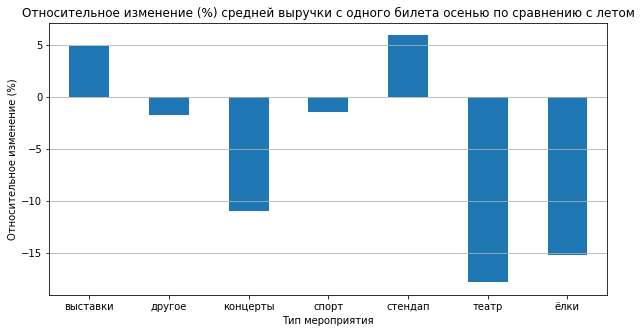

In [61]:
# Визуализируем относительное изменение осенних значений по сравнению с летними
autumn_share.plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('Oтносительное изменение (%) средней выручки с одного билета осенью по сравнению с летом')
plt.xlabel('Тип мероприятия')
plt.ylabel('Относительное изменение (%)')
plt.grid(axis='y')
plt.show()

In [62]:
# Создаем датафрейм для удобства построения графика
data_avg = pd.DataFrame({'Лето': summer_avg, 'Осень': autumn_avg})

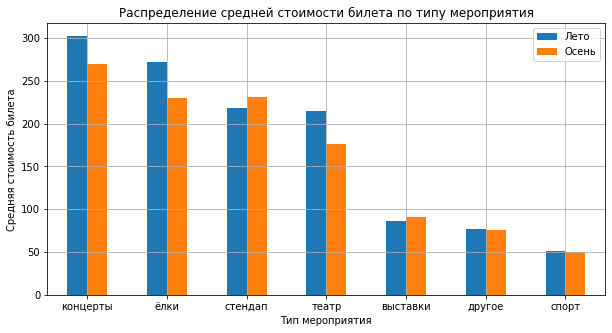

In [63]:
# Строим столбчатую диаграмму
data_avg.sort_values(by='Лето', ascending=False).plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('Распределение средней стоимости билета по типу мероприятия')
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя стоимость билета')
plt.legend()
plt.grid()
plt.show()

По результатам вычислений можно сделать вывод: 
- Осенью доля заказов упала в категориях `концерты`, `другое`, `стендап` и `выставки`, а увеличилась доля заказов в категориях `театр`, `спорт` и `елки`;
- Осенью доля заказов упала в категориях мероприятий по возрастному рейтингу `6`, `16` и `18`, а увеличилась `0` и `12`;
- Осенью доля заказов упала по типу устройства `mobile`, а увеличилась `desktop`;
- Осенью средняя стоимость билета упала в категориях `концерты`, `елки`, `театр`, `другое`, `спорт`, а увеличилась `стендап`, `выставки`.

### 3.2. Осенняя активность пользователей

In [64]:
# Фильтруем датафрейм только по осенним данным
df_aut = df_2.loc[df['season'] == 'осень']

In [65]:
# Выводим первые строки
df_aut.head().style

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
2,7292370,0005ca5e93f2cf4,2024-10-06 00:00:00,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.570000,За билетом!,4,13984.160000,75.000000,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.000000,4507.000000,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06 00:00:00,100,19.647500,kzt,1258.570000,314.642500,10,осень
4,972400,000898990054619,2024-10-04 00:00:00,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410000,Билеты без проблем,3,10695.430000,83.000000,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.000000,1896.000000,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04 00:00:00,100,19.664800,kzt,1390.410000,463.470000,10,осень
5,2613713,000898990054619,2024-10-23 00:00:00,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.740000,Облачко,3,8206.700000,19.000000,9cc55c15-4375-4129-9979-3129688ba1b4,концерт,концерты,№1020,Лугоградская область,Кристалевск,193.000000,930.000000,"Школа живописи ""Солнце"" Групп","бул. Отрадный, д. 4 стр. 1",2024-10-23 00:00:00,100,20.053100,kzt,902.740000,300.913333,10,осень
7,4657981,000a55a418c128c,2024-09-29 00:00:00,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.780000,Лучшие билеты,1,955.520000,nan,0d876e01-851e-458b-ba61-753e0e0c4063,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.000000,3159.000000,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",2024-09-29 00:00:00,100,19.374100,kzt,47.780000,47.780000,9,осень
8,4657952,000a55a418c128c,2024-10-15 00:00:00,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.840000,Лучшие билеты,2,2494.730000,16.000000,ddc795f8-7ef8-4eb0-b299-cb3e6ee24ba1,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.000000,3159.000000,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",2024-10-15 00:00:00,100,19.718500,kzt,74.840000,37.420000,10,осень


In [66]:
# Создаем сводную таблицу, группируя данные по дням
pivot_table = df_aut.groupby('created_dt_msk').agg(
    total_orders = ('order_id', 'count')
    , unique_users = ('user_id', 'nunique')
    , total_revenue = ('revenue', 'sum')
    , total_tickets = ('tickets_count', 'sum')
)
display(pivot_table)

,total_orders,unique_users,total_revenue,total_tickets
created_dt_msk,,,,
2024-09-01,1331,565,743946.98,3733
2024-09-02,1380,574,777955.47,3704
2024-09-03,5114,778,1236893.87,15301
2024-09-04,1774,685,953868.47,4799
2024-09-05,1941,740,1106089.65,5181
...,...,...,...,...
2024-10-27,2853,1036,1485794.63,7883
2024-10-28,2839,985,1373823.41,7925
2024-10-29,2839,999,1385215.20,7964


In [67]:
# Рассчитываем среднее число заказов на одного пользователя
pivot_table['avg_orders_per_user'] = pivot_table['total_orders'] / pivot_table['unique_users']

In [68]:
# Рассчитываем среднюю стоимость одного билета
pivot_table['avg_ticket_price'] = pivot_table['total_revenue'] / pivot_table['total_tickets']
display(pivot_table)

,total_orders,unique_users,total_revenue,total_tickets,avg_orders_per_user,avg_ticket_price
created_dt_msk,,,,,,
2024-09-01,1331,565,743946.98,3733,2.355752,199.289306
2024-09-02,1380,574,777955.47,3704,2.404181,210.031174
2024-09-03,5114,778,1236893.87,15301,6.573265,80.837453
2024-09-04,1774,685,953868.47,4799,2.589781,198.764007
2024-09-05,1941,740,1106089.65,5181,2.622973,213.489606
...,...,...,...,...,...,...
2024-10-27,2853,1036,1485794.63,7883,2.753861,188.480861
2024-10-28,2839,985,1373823.41,7925,2.882234,173.353112
2024-10-29,2839,999,1385215.20,7964,2.841842,173.934606


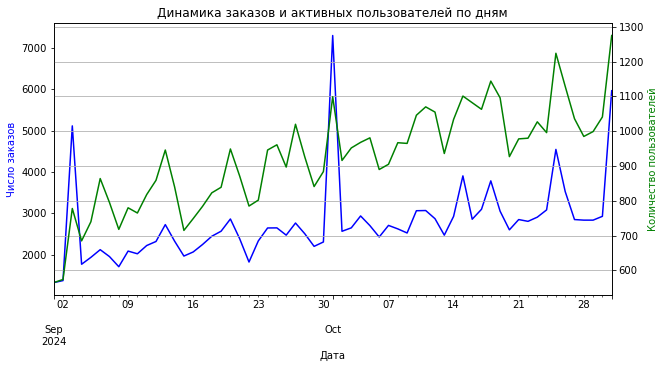

In [69]:
# Строим линейный график: общее число заказов и количество активных пользователей
plt.figure(figsize=(10, 5))

ax1 = pivot_table['total_orders'].plot(kind='line', color='blue', label='Общее число заказов')
ax2 = ax1.twinx()
pivot_table['unique_users'].plot(kind='line', color='green', label='Количество активных пользователей', ax=ax2)

ax1.set_xlabel('Дата')
ax1.set_ylabel('Число заказов', color='blue')
ax2.set_ylabel('Количество пользователей', color='green')

plt.title('Динамика заказов и активных пользователей по дням')
plt.grid()
plt.show()

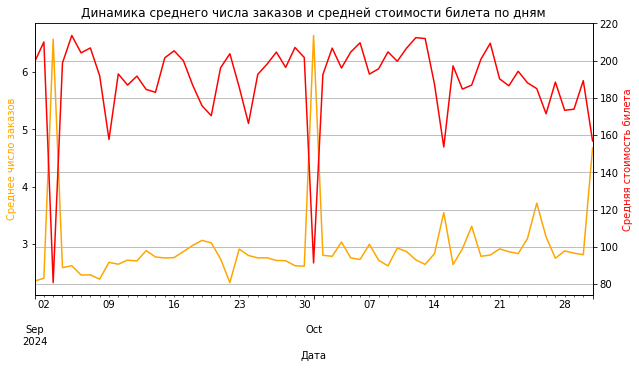

In [70]:
# Строим линейный график: среднее число заказов на одного пользователя и средняя стоимость одного билета
plt.figure(figsize=(10, 5))

ax3 = pivot_table['avg_orders_per_user'].plot(kind='line', color='orange', label='Среднее число заказов на пользователя')
ax4 = ax3.twinx()
pivot_table['avg_ticket_price'].plot(kind='line', color='red', label='Средняя стоимость билета', ax=ax4)

ax3.set_xlabel('Дата')
ax3.set_ylabel('Среднее число заказов', color='orange')
ax4.set_ylabel('Средняя стоимость билета', color='red')

plt.title('Динамика среднего числа заказов и средней стоимости билета по дням')
plt.grid()
plt.show()

In [71]:
# Добавляем новый столбец с днем недели
df_aut.loc[:, 'day_of_week'] = df_aut['created_dt_msk'].dt.day_name()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [72]:
# Создаем новый столбец с разделением на будние и выходные дни
df_aut.loc[:, 'weekday_or_weekend'] = df_aut['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [73]:
# ВЫводим первые строки
df_aut.head().style

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season,day_of_week,weekday_or_weekend
2,7292370,0005ca5e93f2cf4,2024-10-06 00:00:00,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.570000,За билетом!,4,13984.160000,75.000000,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.000000,4507.000000,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06 00:00:00,100,19.647500,kzt,1258.570000,314.642500,10,осень,Sunday,Weekend
4,972400,000898990054619,2024-10-04 00:00:00,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410000,Билеты без проблем,3,10695.430000,83.000000,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.000000,1896.000000,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04 00:00:00,100,19.664800,kzt,1390.410000,463.470000,10,осень,Friday,Weekday
5,2613713,000898990054619,2024-10-23 00:00:00,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.740000,Облачко,3,8206.700000,19.000000,9cc55c15-4375-4129-9979-3129688ba1b4,концерт,концерты,№1020,Лугоградская область,Кристалевск,193.000000,930.000000,"Школа живописи ""Солнце"" Групп","бул. Отрадный, д. 4 стр. 1",2024-10-23 00:00:00,100,20.053100,kzt,902.740000,300.913333,10,осень,Wednesday,Weekday
7,4657981,000a55a418c128c,2024-09-29 00:00:00,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.780000,Лучшие билеты,1,955.520000,nan,0d876e01-851e-458b-ba61-753e0e0c4063,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.000000,3159.000000,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",2024-09-29 00:00:00,100,19.374100,kzt,47.780000,47.780000,9,осень,Sunday,Weekend
8,4657952,000a55a418c128c,2024-10-15 00:00:00,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.840000,Лучшие билеты,2,2494.730000,16.000000,ddc795f8-7ef8-4eb0-b299-cb3e6ee24ba1,спектакль,театр,№1637,Поленовский край,Дальнозолотск,18.000000,3159.000000,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",2024-10-15 00:00:00,100,19.718500,kzt,74.840000,37.420000,10,осень,Tuesday,Weekday


In [74]:
# Сравниваем пользовательскую активность в будние и выходные дни
df_aut.groupby('weekday_or_weekend')['user_id'].nunique()

weekday_or_weekend
Weekday    13226
Weekend     7167
Name: user_id, dtype: int64

По результатам расчетов можно сделать вывод:
- Осенью количество заказов растет пропорционально росту количества пользователей. Причем стабильный рост демонстируется по будним дням, а спад происходит на выходных;
- Осенью среднее число заказов показывает небольшой рост, а средняя стоимость билета наоборот падение. Причем зависимость, чем больше рост среднего числа заказов, тем больше падение средней стоимости билета;
- Осенью в будние дни активность пользователей почти в два раза выше, чем в выходные (будние 13226, выходные 7167).

### 3.3. Популярные события и партнёры

In [75]:
# Рассчитываем количество уникальных мероприятий по регионам осенью
events_region = df_aut.groupby('region_name')['event_id'].nunique().sort_values(ascending=False)
display(events_region)

region_name
Каменевский регион          3914
Североярская область        2610
Широковская область          803
Светополянский округ         764
Речиновская область          529
                            ... 
Верхозёрский край              2
Светолесский край              2
Сосноводолинская область       1
Теплоозёрский округ            0
Лесноярский край               0
Name: event_id, Length: 81, dtype: int64

In [76]:
# Рассчитываем общее количество уникальных мероприятий
total_unique_events = df_aut['event_id'].nunique()

In [77]:
# Рассчитываем долю проводимых мероприятий для каждого региона
events_share_region = round(events_region / total_unique_events * 100, 2)
display(events_share_region)

region_name
Каменевский регион          24.65
Североярская область        16.44
Широковская область          5.06
Светополянский округ         4.81
Речиновская область          3.33
                            ...  
Верхозёрский край            0.01
Светолесский край            0.01
Сосноводолинская область     0.01
Теплоозёрский округ          0.00
Лесноярский край             0.00
Name: event_id, Length: 81, dtype: float64

In [78]:
# Рассчитываем общее количество заказов по регионам осенью
orders_region = df_aut.groupby('region_name')['order_id'].count().sort_values(ascending=False)
display(orders_region)

region_name
Каменевский регион          46706
Североярская область        20663
Медовская область           12043
Широковская область          8715
Озернинский край             7524
                            ...  
Крутоводский регион            14
Верхозёрский край              11
Сосноводолинская область        9
Лесноярский край                0
Теплоозёрский округ             0
Name: order_id, Length: 81, dtype: int64

In [79]:
# Рассчитываем общее количество заказов
total_orders = df_aut['order_id'].count()

In [80]:
# Рассчитываем долю заказов для каждого региона
orders_share_region = round(orders_region / total_orders * 100, 2)
display(orders_share_region)

region_name
Каменевский регион          27.68
Североярская область        12.25
Медовская область            7.14
Широковская область          5.16
Озернинский край             4.46
                            ...  
Крутоводский регион          0.01
Верхозёрский край            0.01
Сосноводолинская область     0.01
Лесноярский край             0.00
Теплоозёрский округ          0.00
Name: order_id, Length: 81, dtype: float64

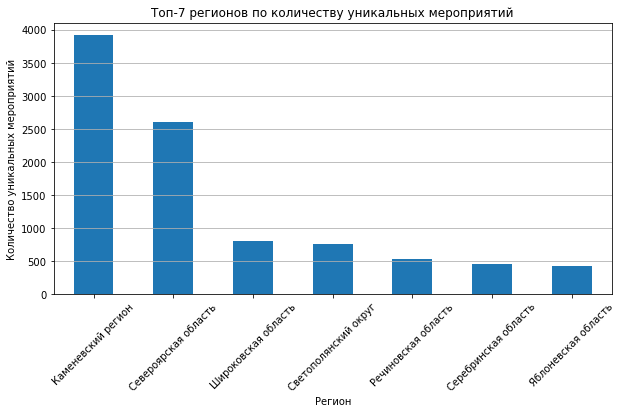

In [81]:
# Определяем n — количество топ-регионов для визуализации
n = 7

# Визуализируем топ-n регионов
top_n_regions = events_region.sort_values(ascending=False).iloc[:n]
top_n_regions.plot(kind='bar', figsize=(10, 5), rot=45)
plt.title(f'Топ-{n} регионов по количеству уникальных мероприятий')
plt.xlabel('Регион')
plt.ylabel('Количество уникальных мероприятий')
plt.grid(axis='y')
plt.show()

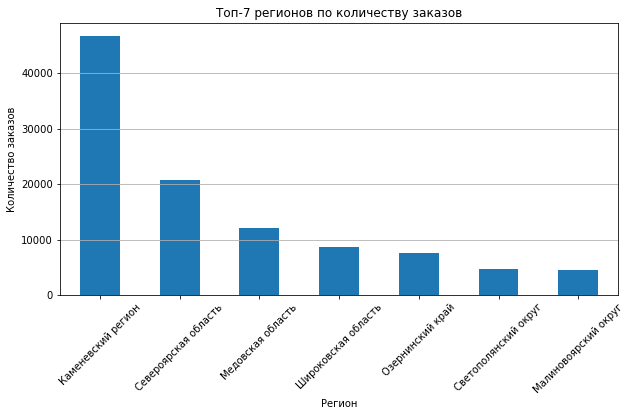

In [82]:
# Определяем n — количество топ-регионов для визуализации
n = 7

# Визуализируем топ-n регионов по количеству заказов
top_n_regions_o = orders_region.sort_values(ascending=False).iloc[:n]
top_n_regions_o.plot(kind='bar', figsize=(10, 5), rot=45)
plt.title(f'Топ-{n} регионов по количеству заказов')
plt.xlabel('Регион')
plt.ylabel('Количество заказов')
plt.grid(axis='y')
plt.show()

- По количеству уникальных мероприятий на первом месте Каменевский регион с долей в 24,65% от всех регионов. На втором месте Североярская область с долей 16,44%. Далее идет более равномерное распределение доли уникальных мероприятий по регионам от 5% и ниже соответственно. Причем в Теплоозёрском округе и Лесноярском крае доля равна 0, то есть там мероприятия не проводились.
- По количеству заказов на первом месте Каменевский регион с долей в 27,68% от всех регионов. На втором месте Североярская область с долей 12,25%. Далее идет более равномерное распределение доли заказов по регионам от 7% и ниже соответственно. В Теплоозёрском округе и Лесноярском крае доля заказов также равна 0, то есть там заказы не оформлялись.

In [83]:
# Рассчитываем количество уникальных мероприятий для каждого билетного партнёра
events_service = df_aut.groupby('service_name')['event_id'].nunique().sort_values(ascending=False)
display(events_service)

service_name
Лови билет!               3618
Билеты без проблем        2845
Билеты в руки             2471
Облачко                   1409
Лучшие билеты             1397
Мой билет                 1003
Тебе билет!                859
Прачечная                  728
Весь в билетах             600
Яблоко                     537
Городской дом культуры     289
Show_ticket                204
За билетом!                200
Край билетов               193
Дом культуры               191
Crazy ticket!              178
Быстробилет                133
Мир касс                   131
Восьмёрка                   92
Выступления.ру              79
Росбилет                    41
КарандашРУ                  28
Вперёд!                     21
Телебилет                   12
Шоу начинается!             11
Билет по телефону           10
Радио ticket                 7
Реестр                       4
Дырокол                      2
Тех билет                    2
Зе Бест!                     1
Билеты в интернете        

In [84]:
# Рассчитываем долю проводимых мероприятий для каждого билетного партнёра
events_share_service = round(events_service / total_unique_events * 100, 2)
display(events_share_service)

service_name
Лови билет!               22.79
Билеты без проблем        17.92
Билеты в руки             15.56
Облачко                    8.87
Лучшие билеты              8.80
Мой билет                  6.32
Тебе билет!                5.41
Прачечная                  4.58
Весь в билетах             3.78
Яблоко                     3.38
Городской дом культуры     1.82
Show_ticket                1.28
За билетом!                1.26
Край билетов               1.22
Дом культуры               1.20
Crazy ticket!              1.12
Быстробилет                0.84
Мир касс                   0.83
Восьмёрка                  0.58
Выступления.ру             0.50
Росбилет                   0.26
КарандашРУ                 0.18
Вперёд!                    0.13
Телебилет                  0.08
Шоу начинается!            0.07
Билет по телефону          0.06
Радио ticket               0.04
Реестр                     0.03
Дырокол                    0.01
Тех билет                  0.01
Зе Бест!                   

In [85]:
# Рассчитываем общее количество заказов для каждого билетного партнёра
orders_service = df_aut.groupby('service_name')['order_id'].count().sort_values(ascending=False)
display(orders_service)

service_name
Билеты без проблем        32475
Лови билет!               25802
Билеты в руки             25732
Мой билет                 19403
Облачко                   15478
Лучшие билеты             12438
Весь в билетах             9426
Прачечная                  5798
Тебе билет!                3766
Яблоко                     3473
Край билетов               3004
Дом культуры               1740
Городской дом культуры     1738
За билетом!                1738
Show_ticket                1300
Быстробилет                1162
Мир касс                    988
Выступления.ру              917
Crazy ticket!               550
Шоу начинается!             406
Восьмёрка                   390
Радио ticket                322
Телебилет                   206
Росбилет                    189
КарандашРУ                   69
Дырокол                      62
Билет по телефону            50
Кино билет                   48
Вперёд!                      38
Реестр                       16
Быстрый кассир             

In [86]:
# Рассчитываем долю заказов для каждого билетного партнёра
orders_share_service = round(orders_service / total_orders * 100, 2)
display(orders_share_service)

service_name
Билеты без проблем        19.25
Лови билет!               15.29
Билеты в руки             15.25
Мой билет                 11.50
Облачко                    9.17
Лучшие билеты              7.37
Весь в билетах             5.59
Прачечная                  3.44
Тебе билет!                2.23
Яблоко                     2.06
Край билетов               1.78
Дом культуры               1.03
Городской дом культуры     1.03
За билетом!                1.03
Show_ticket                0.77
Быстробилет                0.69
Мир касс                   0.59
Выступления.ру             0.54
Crazy ticket!              0.33
Шоу начинается!            0.24
Восьмёрка                  0.23
Радио ticket               0.19
Телебилет                  0.12
Росбилет                   0.11
КарандашРУ                 0.04
Дырокол                    0.04
Билет по телефону          0.03
Кино билет                 0.03
Вперёд!                    0.02
Реестр                     0.01
Быстрый кассир             

In [87]:
# Рассчитываем суммарную выручку для каждого билетного партнёра
revenue_service = df_aut.groupby('service_name')['revenue'].sum().sort_values(ascending=False)
display(revenue_service)

service_name
Билеты без проблем        13867461.90
Мой билет                 11543015.86
Облачко                   10611051.69
Лови билет!               10412236.58
Весь в билетах             9378863.91
Билеты в руки              7619000.37
Край билетов               3037065.17
Яблоко                     2763332.31
Прачечная                  2548310.47
Тебе билет!                2181782.10
Лучшие билеты              1672790.03
Дом культуры               1640817.41
За билетом!                1200925.26
Городской дом культуры     1054292.87
Быстробилет                 929493.20
Show_ticket                 906167.06
Мир касс                    835427.38
Выступления.ру              606630.12
Шоу начинается!             405148.16
Crazy ticket!               319451.55
Росбилет                    286815.50
Восьмёрка                   238422.40
Телебилет                   113377.05
Дырокол                      88888.88
Кино билет                   81729.24
Радио ticket                 44719.95

In [88]:
# Рассчитываем общую выручку
total_revenue = df_aut['revenue'].sum()

In [89]:
# Рассчитываем долю выручки для каждого билетного партнёра
revenue_share_service = round(revenue_service / total_revenue * 100, 2)
display(revenue_share_service)

service_name
Билеты без проблем        16.42
Мой билет                 13.66
Облачко                   12.56
Лови билет!               12.33
Весь в билетах            11.10
Билеты в руки              9.02
Край билетов               3.60
Яблоко                     3.27
Прачечная                  3.02
Тебе билет!                2.58
Лучшие билеты              1.98
Дом культуры               1.94
За билетом!                1.42
Городской дом культуры     1.25
Быстробилет                1.10
Show_ticket                1.07
Мир касс                   0.99
Выступления.ру             0.72
Шоу начинается!            0.48
Crazy ticket!              0.38
Росбилет                   0.34
Восьмёрка                  0.28
Телебилет                  0.13
Дырокол                    0.11
Кино билет                 0.10
Радио ticket               0.05
Билет по телефону          0.04
Реестр                     0.02
Вперёд!                    0.02
КарандашРУ                 0.02
Быстрый кассир             

- По количеству уникальных мероприятий на первом месте `Лови билет!` с долей в 22,79% от всех билетных партнеров. На втором месте `Билеты без проблем` с долей 17,92%. На третьем месте `Билеты в руки` с долей 15,56%. Далее идет более равномерное распределение доли от 8% и ниже соответственно. Причем в `Цвет и билет` доля равна 0.
- По количеству заказов на первом месте `Билеты без проблем` с долей 19.25,68% от всех билетных партнеров. На втором месте `Лови билет!` с долей 15.29%. На третьем месте `Билеты в руки` с долей 15.25%. Далее идет более равномерное распределение доли заказов от 11% и ниже соответственно. Причем в `Цвет и билет` доля равна 0.
- По суммарной выручке на первом месте `Билеты без проблем` с долей 16,42%. На втором месте `Мой билет` с долей 13,66%. На третьем месте `Облачко` с долей 12.56%. Партнер `Лови билет!` на четвертом месте с долей 12,32%, хотя по количеству мероприятий этот оператор был на первом месте. Можно увидеть зависимость, что лидером суммарной выручки оказался лидер по количеству билетов. `Цвет и билет` ожидаемо не показал выручки.

### 4. Статистический анализ данных

#### Гипотеза 1: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

- Нулевая гипотеза H₀: Среднее колчество заказов на одного пользователя мобильного приложения по сравнению с пользователями стационарных устройств не различается.

- Альтернативная гипотеза H₁: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств и это различие статистически значимо.

In [90]:
# Фильтруем пользователей по группе мобильных устройств
mobile = df_aut[df_aut['device_type_canonical'] == 'mobile']

In [91]:
# Фильтруем пользователей по группе стационарных устройств
desktop = df_aut[df_aut['device_type_canonical'] == 'desktop']

In [92]:
# Проверяем группы на пересечение пользователей
intersection = set(mobile['user_id']).intersection(set(desktop['user_id']))
display(len(intersection))

3251

In [93]:
# Удаляем пересекающихся пользователей в обоих группах из группы мобильных устройств
mobile = mobile[~mobile['user_id'].isin(intersection)]

In [94]:
# Удаляем пересекающихся пользователей в обоих группах из группы стационарных устройств
desktop = desktop[~desktop['user_id'].isin(intersection)]

In [95]:
# Проверяем удаление
intersection_2 = set(mobile['user_id']).intersection(set(desktop['user_id']))
display(len(intersection_2))

0

In [96]:
# Рассчитываем общее количество заказов для группы мобильных устройств
mobile_orders = mobile['order_id'].count()
display(mobile_orders)

31304

In [97]:
# Рассчитываем общее количество заказов для группы стационарных устройств
desktop_orders = desktop['order_id'].count()
display(desktop_orders)

3190

In [98]:
# Рассчитываем количество уникальных пользователей для группы мобильных устройств
mobile_users = mobile['user_id'].nunique()
display(mobile_users)

10944

In [99]:
# Рассчитываем количество уникальных пользователей для группы стационарных устройств
desktop_users = desktop['user_id'].nunique()
display(desktop_users)

1621

In [100]:
# Рассчитываем среднее количество заказов на одного пользователя мобильного устройства
avg_mobile_per_user = round(mobile_orders / mobile_users, 2)
display(avg_mobile_per_user)

2.86

In [101]:
# Рассчитываем среднее количество заказов на одного пользователя стационарных устройств
avg_desktop_per_user = round(desktop_orders / desktop_users, 2)
display(avg_desktop_per_user)

1.97

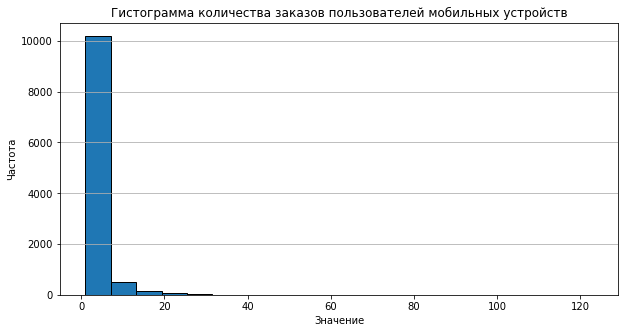

In [102]:
# Создаём гистограмму
plt.figure(figsize=(10, 5))
plt.hist(mobile.groupby('user_id')['order_id'].count(), bins=20, edgecolor='black')
plt.title('Гистограмма количества заказов пользователей мобильных устройств')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()


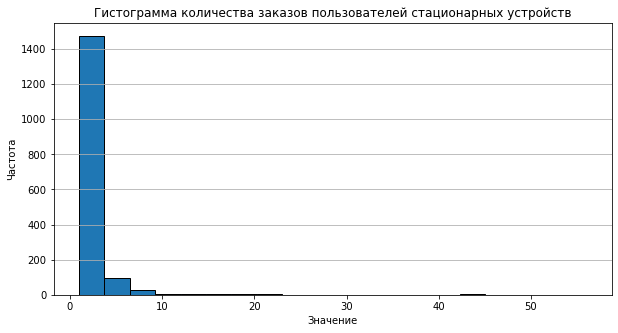

In [103]:
# Создаём гистограмму
plt.figure(figsize=(10, 5))
plt.hist(desktop.groupby('user_id')['order_id'].count(), bins=20, edgecolor='black')
plt.title('Гистограмма количества заказов пользователей стационарных устройств')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()


In [104]:
# Проводим тест Шапиро для пользователей мобильных устройств
stat, p = shapiro(mobile.groupby('user_id')['order_id'].count())
print(f'Статистика теста: {stat}')
print(f'p-значение: {p}')

# Интерпретация результата
alpha = 0.05
if p > alpha:
    print("Данные не отличаются от нормально распределённых (не отвергаем нулевую гипотезу)")
else:
    print("Данные отличаются от нормально распределённых (отвергаем нулевую гипотезу)")


Статистика теста: 0.45368528366088867
p-значение: 0.0
Данные отличаются от нормально распределённых (отвергаем нулевую гипотезу)


C:\Users\Евгений\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [105]:
# Проводим тест Шапиро для пользователей стационарных устройств
stat, p = shapiro(desktop.groupby('user_id')['order_id'].count())
print(f'Статистика теста: {stat}')
print(f'p-значение: {p}')

# Интерпретация результата
alpha = 0.05
if p > alpha:
    print("Данные не отличаются от нормально распределённых (не отвергаем нулевую гипотезу)")
else:
    print("Данные отличаются от нормально распределённых (отвергаем нулевую гипотезу)")


Статистика теста: 0.2984495162963867
p-значение: 0.0
Данные отличаются от нормально распределённых (отвергаем нулевую гипотезу)


Для проверки гипотезы о том, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств будем использовать тест Манна-Уитни поскольку тест основан на рангах, он менее чувствителен к экстремальным значениям или выбросам в данных по сравнению с параметрическими тестами.

In [106]:
# Проводим тест Манна-Уитни
metric_m = mobile.groupby('user_id')['order_id'].count()
metriс_d = desktop.groupby('user_id')['order_id'].count()

alpha = 0.05
stat_mw, p_value_mw = mannwhitneyu(
    metric_m
    , metriс_d
    , alternative = 'greater'
)
print(f'Значение p-value = {p_value_mw}')
      
if p_value_mw > alpha:
    print('Нулевая гипотеза находит подтверждение! Среднее колчество заказов на одного пользователя мобильного приложения по сравнению с пользователями стационарных устройств не различается')
else:
    print('Нулевая гипотеза не находит подтверждения! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств и это различие статистически значимо')

Значение p-value = 7.989340353734217e-40
Нулевая гипотеза не находит подтверждения! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств и это различие статистически значимо


In [107]:
# # Проводим тест Стьюдента
# metric_m = mobile.groupby('user_id')['order_id'].count()
# metriс_d = desktop.groupby('user_id')['order_id'].count()

# alpha = 0.05
# stat_ttest, p_value_ttest = ttest_ind(
#     metric_m
#     , metriс_d
#     , alternative = 'greater'
# )
# print(f'Значение p-value = {p_value_ttest}')
      
# if p_value_ttest > alpha:
#     print('Нулевая гипотеза находит подтверждение! Среднее колчество заказов на одного пользователя мобильного приложения по сравнению с пользователями стационарных устройств не различается')
# else:
#     print('Нулевая гипотеза не находит подтверждения! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств и это различие статистически значимо')

#### Гипотеза 2: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

- Нулевая гипотеза H₀: Среднее время между заказами пользователей мобильных приложений по сравнению с пользователями стационарных устройств не различается.

- Альтернативная гипотеза H₁: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [108]:
# Создаем новый датафрейм с отсортированными заказами по времени
df_3 = df_aut.sort_values(by=['user_id', 'created_ts_msk'])

In [109]:
# Создаем новый столбец с разницей между последовательными заказами
df_3['time_diff'] = df_3.groupby('user_id')['created_ts_msk'].diff()

In [110]:
# Выводим первые строки
df_3.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season,day_of_week,weekday_or_weekend,time_diff
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,100,19.6475,kzt,1258.57,314.642500,10,осень,Sunday,Weekend,NaT
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,100,19.6648,kzt,1390.41,463.470000,10,осень,Friday,Weekday,NaT
5,2613713,000898990054619,2024-10-23,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.74,...,100,20.0531,kzt,902.74,300.913333,10,осень,Wednesday,Weekday,18 days 16:38:45
7,4657981,000a55a418c128c,2024-09-29,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.78,...,100,19.3741,kzt,47.78,47.780000,9,осень,Sunday,Weekend,NaT
8,4657952,000a55a418c128c,2024-10-15,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.84,...,100,19.7185,kzt,74.84,37.420000,10,осень,Tuesday,Weekday,15 days 14:49:52


In [111]:
# Фильтруем пользователей по группе мобильных устройств
mobile_2 = df_3[df_3['device_type_canonical'] == 'mobile']

In [112]:
# Фильтруем пользователей по группе стационарных устройств
desktop_2 = df_3[df_3['device_type_canonical'] == 'desktop']

In [113]:
# Проверяем группы на пересечение пользователей
intersection_3 = set(mobile_2['user_id']).intersection(set(desktop_2['user_id']))
display(len(intersection_3))

3251

In [114]:
# Удаляем пересекающихся пользователей в обоих группах из группы мобильных устройств
mobile_2 = mobile_2[~mobile_2['user_id'].isin(intersection)]

In [115]:
# Удаляем пересекающихся пользователей в обоих группах из группы стационарных устройств
desktop_2 = desktop_2[~desktop_2['user_id'].isin(intersection)]

In [116]:
# Проверяем удаление
intersection_4 = set(mobile_2['user_id']).intersection(set(desktop_2['user_id']))
display(len(intersection_4))

0

In [117]:
# Рассчитываем среднее время между заказами пользователей мобильных устройств
mobile_avg_time = mobile_2['time_diff'].mean()
display(mobile_avg_time)

Timedelta('4 days 14:54:14.921709233')

In [118]:
# Рассчитываем среднее время между заказами пользователей стационарных устройств
desktop_avg_time = desktop_2['time_diff'].mean()
display(desktop_avg_time)

Timedelta('2 days 13:35:56.796685787')

In [119]:
# Создаем новый столбец для преобразования временных интервалов в секунды
mobile_2['time_diff_seconds'] = mobile_2['time_diff'].dt.total_seconds()

In [120]:
# Создаем новый столбец для преобразования временных интервалов в секунды
desktop_2['time_diff_seconds'] = desktop_2['time_diff'].dt.total_seconds()

In [121]:
# Заполняем пропуски в столбце time_diff_seconds
mobile_2['time_diff_seconds'] = mobile_2['time_diff'].fillna(pd.Timedelta('0s'))

In [122]:
# Заполняем пропуски в столбце time_diff_seconds
desktop_2['time_diff_seconds'] = desktop_2['time_diff'].fillna(pd.Timedelta('0s'))

In [123]:
# Выводим первые строки
desktop_2.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season,day_of_week,weekday_or_weekend,time_diff,time_diff_seconds
92,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.18,...,18.9330,kzt,65.731589,21.910530,9,осень,Monday,Weekday,NaT,0 days 00:00:00
127,2994686,006d1660d830822,2024-09-01,2024-09-01 16:43:50,558435,нет,6,rub,desktop,31.09,...,18.9330,kzt,31.090000,10.363333,9,осень,Sunday,Weekend,NaT,0 days 00:00:00
128,2994802,006d1660d830822,2024-09-25,2024-09-25 13:18:41,569860,нет,6,rub,desktop,86.21,...,19.3262,kzt,86.210000,21.552500,9,осень,Wednesday,Weekday,23 days 20:34:51,23 days 20:34:51
129,2994744,006d1660d830822,2024-09-29,2024-09-29 17:02:46,569874,нет,6,rub,desktop,46.13,...,19.3741,kzt,46.130000,15.376667,9,осень,Sunday,Weekend,4 days 03:44:05,4 days 03:44:05
130,2994715,006d1660d830822,2024-10-03,2024-10-03 15:04:48,355361,нет,0,rub,desktop,212.11,...,19.6841,kzt,212.110000,70.703333,10,осень,Thursday,Weekday,3 days 22:02:02,3 days 22:02:02


Для проверки гипотезы о том, что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств будем использовать тест Манна-Уитни поскольку тест основан на рангах, он менее чувствителен к экстремальным значениям или выбросам в данных по сравнению с параметрическими тестами.

In [124]:
# Проводим тест Манна-Уитни
metric_m_2 = mobile_2['time_diff_seconds']
metriс_d_2 = desktop_2['time_diff_seconds']

alpha = 0.05
stat_mw, p_value_mw = mannwhitneyu(
    metric_m_2
    , metriс_d_2
    , alternative = 'greater'
)
print(f'Значение p-value = {p_value_mw}')
      
if p_value_mw > alpha:
    print('Нулевая гипотеза находит подтверждение! Среднее время между заказами пользователей пользователя мобильного приложения по сравнению с пользователями стационарных устройств не различается')
else:
    print('Нулевая гипотеза не находит подтверждения! Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств и это различие статистически значимо')

Значение p-value = 6.935192674659579e-126
Нулевая гипотеза не находит подтверждения! Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств и это различие статистически значимо


После проведения статистического анализа можно сделать вывод, что обе гипотезы получили подтверждение. Среднее количество заказов на одного пользователя мобильного приложения (2,86) примерно на один заказ выше по сравнению с пользователями стационарных устройств (1,97).
Среднее время между заказами пользователей мобильных приложений (4 дня) примерно на два дня выше по сравнению с пользователями стационарных устройств (2 дня).

## Итоговый вывод

Для анализа использовались данные о сервисе Яндекс Афиша за период с 01.06.2024 по 31.10.2024. 
Данные состоят из трех датасетов:
- `final_tickets_orders_df.csv` - информация обо всех заказах билетов, совершенных с двух типов устройств - мобильных и стационарных;
- `final_tickets_events_df` - информация о событиях, включая город и регион события, а также информация о площадке проведения мероприятия;
- `final_tickets_tenge_df.csv` - информация о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге.

По результатам расчета количества заказов по месяцам хорошо видно, что от июня к ноябрю фиксируется рост. Более высокий рост фиксируется в сентябре и октябре.

Анализ распределения заказов по сегментам и их сезонные изменения: 
- Осенью доля заказов упала в категориях `концерты`, `другое`, `стендап` и `выставки`, а увеличилась доля заказов в категориях `театр`, `спорт` и `елки`;
- Осенью доля заказов упала в категориях мероприятий по возрастному рейтингу `6`, `16` и `18`, а увеличилась `0` и `12`;
- Осенью доля заказов упала по типу устройства `mobile`, а увеличилась `desktop`;
- Осенью средняя стоимость билета упала в категориях `концерты`, `елки`, `театр`, `другое`, `спорт`, а увеличилась `стендап`, `выставки`.

Осенняя активность пользователей:
- Осенью количество заказов растет пропорционально росту количества пользователей. Причем стабильный рост демонстируется по будним дням, а спад происходит на выходных;
- Осенью среднее число заказов показывает небольшой рост, а средняя стоимость билета наоборот падение. Причем зависимость, чем больше рост среднего числа заказов, тем больше падение средней стоимости билета;
- Осенью в будние дни активность пользователей почти в два раза выше, чем в выходные (будние 13226, выходные 7167).

Популярные события:
- По количеству уникальных мероприятий на первом месте Каменевский регион с долей в 24,65% от всех регионов. На втором месте Североярская область с долей 16,44%. Далее идет более равномерное распределение доли уникальных мероприятий по регионам от 5% и ниже соответственно. Причем в Теплоозёрском округе и Лесноярском крае доля равна 0, то есть там мероприятия не проводились.
- По количеству заказов на первом месте Каменевский регион с долей в 27,68% от всех регионов. На втором месте Североярская область с долей 12,24%. Далее идет более равномерное распределение доли заказов по регионам от 7% и ниже соответственно. В Теплоозёрском округе и Лесноярском крае доля заказов также равна 0, то есть там заказы не оформлялись.

Популярные партнеры:
- По количеству уникальных мероприятий на первом месте `Лови билет!` с долей в 22,79% от всех билетных партнеров. На втором месте `Билеты без проблем` с долей 17,92%. На третьем месте `Билеты в руки` с долей 15,56%. Далее идет более равномерное распределение доли от 8% и ниже соответственно. Причем в `Цвет и билет` доля равна 0.
- По количеству заказов на первом месте `Билеты без проблем` с долей 19.25,68% от всех билетных партнеров. На втором месте `Лови билет!` с долей 15.29%. На третьем месте `Билеты в руки` с долей 15.25%. Далее идет более равномерное распределение доли заказов от 11% и ниже соответственно. Причем в `Цвет и билет` доля равна 0.
- По суммарной выручке на первом месте `Билеты без проблем` с долей 16,42%. На втором месте `Мой билет` с долей 13,66%. На третьем месте `Облачко` с долей 12.56%. Партнер `Лови билет!` на четвертом месте с долей 12,32%, хотя по количеству мероприятий этот оператор был на первом месте. Можно увидеть зависимость, что лидером суммарной выручки оказался лидер по количеству билетов. `Цвет и билет` ожидаемо не показал выручки.

После проведения статистического анализа можно сделать вывод, что обе гипотезы получили подтверждение. Среднее количество заказов на одного пользователя мобильного приложения (2,86) примерно на один заказ выше по сравнению с пользователями стационарных устройств (1,97).
Среднее время между заказами пользователей мобильных приложений (4 дня) примерно на два дня выше по сравнению с пользователями стационарных устройств (2 дня).

Рекомендации:

Разрабатывать новые функции и сервисы, ориентированные на мобильные устройства.

Проводить чаще события, приносящие наибольшую выручку. А события с наименьшей выручкой проводить реже. Возможно стоит более подробно изучить аудиторию, выбирающих те или иные события.

Разрабатывать специальные предложения и акции, учитывающие сезонные колебания. Для того, чтобы они были более эффективными провести анализ данных за несколько периодов. Так получится более детально выявить сезонные закономерности.